# 1. Neural network with keras

In [1]:
import os
from keras import backend as K

K.backend() # check backend of Keras

Using TensorFlow backend.


'tensorflow'

In [0]:
import numpy as np
from datetime import datetime
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense
from keras.utils import np_utils
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
from keras.optimizers import SGD

sns.set() # Draw grid on plot

In [0]:
"""
 That class, Timer checks elasped time for training
"""
class Timer:

  def __init__(self):
    self.start = None
    self.end = None

  def start_timer(self):
    self.start = datetime.now()

  def stop_timer(self):
    self.end = datetime.now()
    return self.end - self.start

In [0]:
def display_dataset(X_train, y_train):  
  fig, ax = plt.subplots(8, 8, figsize = (6, 6))
  fig.suptitle('MNIST')
  fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
  for y, x in [(j, i) for j in range(8) for i in range(8)]:
    idx = np.random.randint(len(y_test))
    ax[y, x].imshow(X_train[idx])
    ax[y, x].set_title(y_train[idx])
    ax[y,x].axis('off')

def display_history(history):
  h = history.history
  fig, ax = plt.subplots(1,2, figsize = (8,4))
  plt.subplots_adjust(wspace = 0.5)
  fig.suptitle('Training result')

  ax[0].set_title('Accuracy')
  ax[0].set_xlabel('epochs')
  ax[0].set_ylabel('accuracy')
  ax[0].plot(h['acc'])
  ax[0].plot(h['val_acc'])
  
  ax[1].set_title('Loss')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('loss')
  ax[1].plot(h['loss'])
  ax[1].plot(h['val_loss'])
  fig.legend(['train','validation'])

def visualize_prediction(X_test,y_test,preds):
  fig, ax = plt.subplots(4, 4, figsize = (10, 10))
  plt.subplots_adjust(hspace = 0.8)
  fig.suptitle('Test')

  for y, x in [(j, i) for j in range(4) for i in range(4)]:
    if y == 2 and x == 0 : # display false prediction
      _X_test = X_test[y_test != preds.argmax(axis = 1)]
      _preds = preds[y_test != preds.argmax(axis = 1)]
      _y_test = y_test[y_test != preds.argmax(axis = 1)]

    elif y == 0 and x == 0 : # display true prediction
      _X_test = X_test[y_test == preds.argmax(axis = 1)]
      _preds = preds[y_test == preds.argmax(axis = 1)]
      _y_test = y_test[y_test == preds.argmax(axis = 1)]
      
      
    idx = np.random.randint(len(_y_test))
    ax[y, x].set_title("true : "+str(_y_test[idx])+"\n pred : " + str(_preds[idx].argmax())+"\n"+str(round(_preds[idx].max(),2)))
    ax[y, x].axis('off')
    ax[y, x].imshow(_X_test[idx])

In [5]:
model = None
CLASSES = 10 # Number of labels
HIDDENS = 128 # How many neurons(nodes) in hidden layers
EPOCHS = 20 # train dataset is used "EPOCHS" times
BATCH_SIZE = 128 # How many data in the train dataset are used for update of weights one time
VERBOSE = 2 # How expression for training is printed
VALIDATION_SPLIT = 0.2 # How many data in train dataset are used for validation dataset which is not used for training

"""
 60,000 number of training dataset
 10,000 number of test dataset
 X_train includes 60,000 number of data, 28x28 matrix, to be trained
 y_train includes one vector whose number of elements is 60,000
 X_test includes 10,000 number of data, 28x28 matrix, to be trained
 y_test includes one vector whose number of elements is 10,000
"""
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# look channel, number of data, is first
print('X_train.shape :',X_train.shape,'It means there are 60,000 number of data, 28x28 matrix in train dataset')
print('X_test.shape :',X_test.shape,' It means there are 10,000 number of data, 28x28 matrix in test dataset')

11493376/11490434 [==============================] - 1s 0us/step
X_train.shape : (60000, 28, 28) It means there are 60,000 number of data, 28x28 matrix in train dataset
X_test.shape : (10000, 28, 28)  It means there are 10,000 number of data, 28x28 matrix in test dataset


In [6]:
print('y_train.shape :',y_train.shape,'It means that y_train includes one vector whose number of elements is 60,000')
print('y_test,shape :',y_test.shape,'It means that y_test includes one vector whose number of elements is 10,000')

y_train.shape : (60000,) It means that y_train includes one vector whose number of elements is 60,000
y_test,shape : (10000,) It means that y_test includes one vector whose number of elements is 10,000


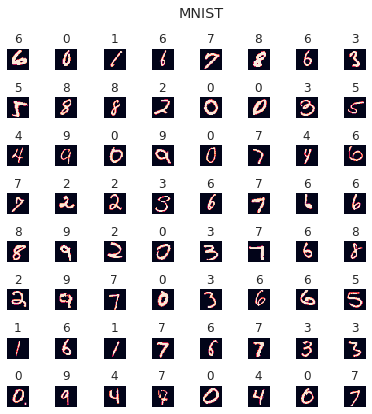

In [7]:
# Visualize dataset
display_dataset(X_train, y_train)

In [8]:
"""
 Every image, 28x28 matrix, for train dataset and test dataset has to be converted into vector to be entered.
 As a result, X_train and X_test become 60,000x784 matrix and 10,000x784 matrix that size of each row means number of data 
and size of each column means number of features, 28*28=784.
 Before being entered into the model, they have to be normalized. 
"""
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

# Divide each feature by 255, maximum value of brightness, to normalize those data
X_train /= 255
X_test /= 255

"""
 Following is one-hot-encoding.
 As I mentioned, the vector has 60,000 number of elements in y_train 
and 10,000 number of elements in y_test.
 One-hot encoding makes the vector a matrix that size of each row means number of data and size of each column means number of labels.
 Each label is re-written in label-th element as 1 and the others as 0
(e.g. 4 -> [0,0,0,0,1,0,0,0,0,0], remember label is one of 0 ~ 9) 
"""
Y_train = np_utils.to_categorical(y_train, CLASSES)
Y_test = np_utils.to_categorical(y_test, CLASSES)
print('Y_train.shape :',Y_train.shape)
print('Y_test.shape :',Y_test.shape)

Y_train.shape : (60000, 10)
Y_test.shape : (10000, 10)


In [9]:
"""
 Following code is single layer perceptron.
 That class, Dense() means fully connected layer.
 As a result, number of parameters is that 784*10(weights) + 10(biases) = 7850.
 If you run that code, then you see Output Shape is (None, 10). None means batch size, you will define in the method, fit().
and 10 means number of labels 
 A row of Output Shape is None that batch size which will be defined by user later.
"""
if model != None:
  K.clear_session()
model = Sequential()
model.add(Dense(CLASSES, input_shape = (784,),activation = 'softmax'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])
timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/20





 - 1s - loss: 1.3496 - acc: 0.6858 - val_loss: 0.8853 - val_acc: 0.8265
Epoch 2/20
 - 1s - loss: 0.7857 - acc: 0.8288 - val_loss: 0.6535 - val_acc: 0.8567
Epoch 3/20
 - 1s - loss: 0.6388 - acc: 0.8507 - val_loss: 0.5587 - val_acc: 0.8710
Epoch 4/20
 - 1s - loss: 0.5672 - acc: 0.8617 - val_loss: 0.5062 - val_acc: 0.8769
Epoch 5/20
 - 1s - loss: 0.5236 - acc: 0.8686 - val_loss: 0.4724 - val_acc: 0.8812
Epoch 6/20
 - 1s - loss: 0.4937 - acc: 0.8744 - val_loss: 0.4486 - val_acc: 0.8874
Epoch 7/20
 - 1s - loss: 0.4717 - acc: 0.8777 - val_loss: 0.4305 - val_acc: 0.8897
Epoch 8/20
 - 1s - loss: 0.4545 - acc: 0.8807 - val_loss: 0.4164 - val_acc: 0.8928
Epoch 9/20
 - 1s - loss: 0.4407 - acc: 0.8834 - val_loss: 0.4050 - val_acc: 0.8952
Epoch 10/20
 - 1s - loss: 0.4293 - acc: 0.8861 - val_loss: 0.3956 - val_acc: 0.8959
Epoch 11/20
 - 

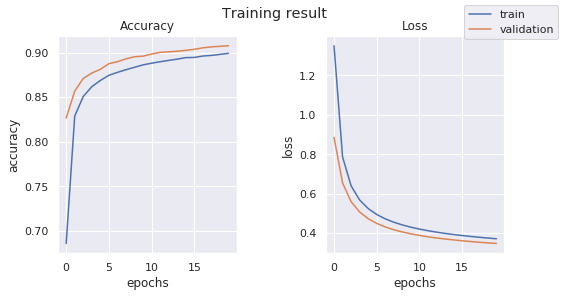

In [11]:
display_history(history)

In [12]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy :',accuracy)

10000/10000 [==============================] - 0s 18us/step
Accuracy : 0.9062


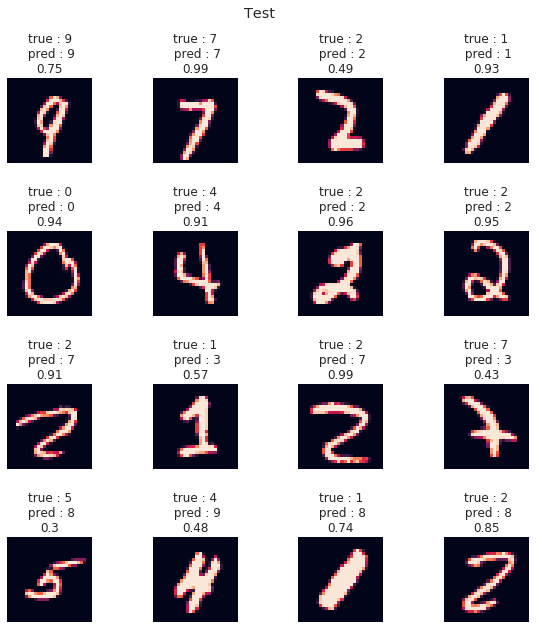

In [13]:
preds = model.predict(X_test)
visualize_prediction(X_test.reshape(10000,28,28),y_test,preds)

## MLP
- 2 layers
- 3 layers
- 4 layers
- 20 layers

In [0]:
"""
 That method describes how many layers are created, using that parameter, layers.
 The number of neurons is same in all layers, except for last layer.
"""
def create_mlp(layers):
  model = Sequential()
  model.add(Dense(HIDDENS, input_shape = (784,), activation = 'relu'))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(HIDDENS, activation = 'relu'))
  model.add(Dense(CLASSES, activation = 'softmax'))
  return model

In [15]:
if model != None:
  K.clear_session()
model = create_mlp(2)
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 1s - loss: 1.2673 - acc: 0.7028 - val_loss: 0.7081 - val_acc: 0.8516
Epoch 2/20
 - 1s - loss: 0.6139 - acc: 0.8544 - val_loss: 0.4888 - val_acc: 0.8837
Epoch 3/20
 - 1s - loss: 0.4813 - acc: 0.8762 - val_loss: 0.4141 - val_acc: 0.8948
Epoch 4/20
 - 1s - loss: 0.4234 - acc: 0.8870 - val_loss: 0.3754 - val_acc: 0.9008
Epoch 5/20
 - 1s - loss: 0.3894 - acc: 0.8935 - val_loss: 0.3505 - val_acc: 0.9054
Epoch 6/20
 - 1s - loss: 0.3662 - acc: 0.8990 - val_loss: 0.3335 - val_acc: 0.9081
Epoch 7/20
 - 1s - loss: 0.3489 - acc: 0.9029 - val_loss: 0.3199 - val_acc: 0.9119
Epoch 8/20
 - 1s - loss: 0.3349 - acc: 0.9064 - val_loss: 0.3088 - val_acc: 0.9139
Epoch 9/20
 - 1s - loss: 0.3232 - acc: 0.9099 - val_loss: 0.2997 - val_acc: 0.9168
Epoch 10/20
 - 1s - loss: 0.3130 - acc: 0.9126 - val_loss: 0.2917 - val_acc: 0.9189
Epoch 11/20
 - 1s - loss: 0.3044 - acc: 0.9150 - val_loss: 0.2845 - val_acc: 0.9210
Epoch 12/20
 - 1s - loss: 0.2965 - 

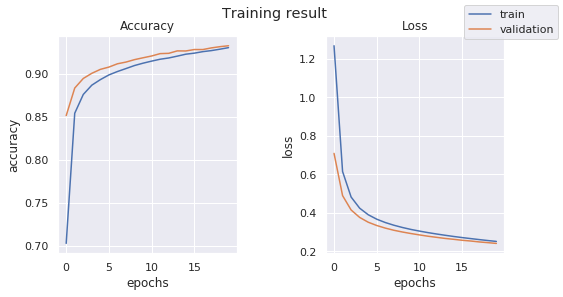

In [17]:
display_history(history = history)

In [18]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy :',accuracy)

10000/10000 [==============================] - 0s 25us/step
Accuracy : 0.9326


In [19]:
if model != None:
  K.clear_session()
model = create_mlp(3)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 1.4728 - acc: 0.6214 - val_loss: 0.7615 - val_acc: 0.8298
Epoch 2/20
 - 2s - loss: 0.6105 - acc: 0.8470 - val_loss: 0.4692 - val_acc: 0.8790
Epoch 3/20
 - 2s - loss: 0.4505 - acc: 0.8791 - val_loss: 0.3860 - val_acc: 0.8947
Epoch 4/20
 - 2s - loss: 0.3893 - acc: 0.8929 - val_loss: 0.3463 - val_acc: 0.9025
Epoch 5/20
 - 1s - loss: 0.3550 - acc: 0.9012 - val_loss: 0.3219 - val_acc: 0.9079
Epoch 6/20
 - 2s - loss: 0.3318 - acc: 0.9066 - val_loss: 0.3046 - val_acc: 0.9137
Epoch 7/20
 - 2s - loss: 0.3138 - acc: 0.9111 - val_loss: 0.2886 - val_acc: 0.9195
Epoch 8/20
 - 1s - loss: 0.2993 - acc: 0.9150 - val_loss: 0.2771 - val_acc: 0.9226
Epoch 9/20
 - 2s - loss: 0.2864 - acc: 0.9180 - val_loss: 0.2673 - val_acc: 0.9245
Epoch 10/20
 - 2s - loss: 0.2751 - acc: 0.9220 - val_loss: 0.2578 - val_acc: 0.9272
Epoch 11/20
 - 2s - loss: 0.2651 - acc: 0.9247 - val_loss: 0.2503 - val_acc: 0.9284
Epoch 12/20
 - 1s - loss: 0.2559 - 

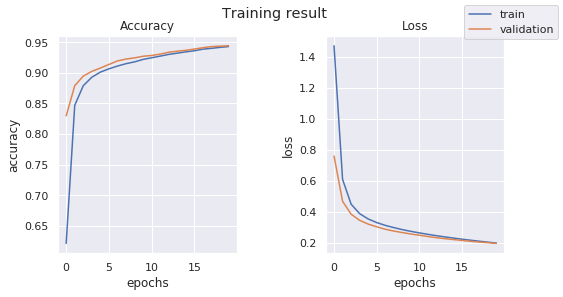

In [21]:
display_history(history = history)

In [22]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :',acc)

Accuracy : 0.9421


In [23]:
if model != None:
  K.clear_session()
model = create_mlp(4)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 1.5804 - acc: 0.5801 - val_loss: 0.7423 - val_acc: 0.8256
Epoch 2/20
 - 2s - loss: 0.5688 - acc: 0.8508 - val_loss: 0.4251 - val_acc: 0.8843
Epoch 3/20
 - 2s - loss: 0.4136 - acc: 0.8837 - val_loss: 0.3541 - val_acc: 0.9007
Epoch 4/20
 - 2s - loss: 0.3596 - acc: 0.8975 - val_loss: 0.3209 - val_acc: 0.9067
Epoch 5/20
 - 2s - loss: 0.3283 - acc: 0.9061 - val_loss: 0.2971 - val_acc: 0.9147
Epoch 6/20
 - 2s - loss: 0.3055 - acc: 0.9124 - val_loss: 0.2784 - val_acc: 0.9191
Epoch 7/20
 - 2s - loss: 0.2877 - acc: 0.9174 - val_loss: 0.2643 - val_acc: 0.9226
Epoch 8/20
 - 2s - loss: 0.2725 - acc: 0.9215 - val_loss: 0.2541 - val_acc: 0.9267
Epoch 9/20
 - 2s - loss: 0.2588 - acc: 0.9254 - val_loss: 0.2432 - val_acc: 0.9289
Epoch 10/20
 - 2s - loss: 0.2468 - acc: 0.9293 - val_loss: 0.2327 - val_acc: 0.9329
Epoch 11/20
 - 2s - loss: 0.2352 - acc: 0.9324 - val_loss: 0.2216 - val_acc: 0.9350
Epoch 12/20
 - 2s - loss: 0.2247 - 

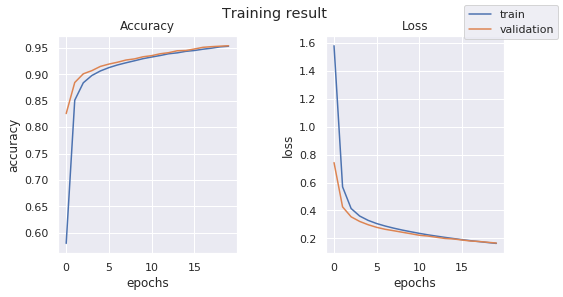

In [25]:
display_history(history = history)

In [26]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9537


In [27]:
if model != None:
  K.clear_session()
model = create_mlp(20)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 128)              

In [28]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 5s - loss: 2.3016 - acc: 0.1140 - val_loss: 2.3012 - val_acc: 0.1060
Epoch 2/20
 - 4s - loss: 2.3000 - acc: 0.1140 - val_loss: 2.2996 - val_acc: 0.1060
Epoch 3/20
 - 4s - loss: 2.2961 - acc: 0.1140 - val_loss: 2.2923 - val_acc: 0.1060
Epoch 4/20
 - 4s - loss: 2.2797 - acc: 0.1681 - val_loss: 2.2622 - val_acc: 0.1957
Epoch 5/20
 - 4s - loss: 2.2050 - acc: 0.2114 - val_loss: 2.0991 - val_acc: 0.2087
Epoch 6/20
 - 4s - loss: 1.8887 - acc: 0.2404 - val_loss: 1.6484 - val_acc: 0.3341
Epoch 7/20
 - 4s - loss: 1.4589 - acc: 0.4342 - val_loss: 1.1601 - val_acc: 0.5685
Epoch 8/20
 - 4s - loss: 1.0812 - acc: 0.5844 - val_loss: 0.8278 - val_acc: 0.6968
Epoch 9/20
 - 4s - loss: 0.8110 - acc: 0.7058 - val_loss: 0.6302 - val_acc: 0.7812
Epoch 10/20
 - 4s - loss: 0.6696 - acc: 0.7836 - val_loss: 0.4573 - val_acc: 0.8763
Epoch 11/20
 - 4s - loss: 0.4665 - acc: 0.8651 - val_loss: 0.3274 - val_acc: 0.9147
Epoch 12/20
 - 4s - loss: 0.3457 - 

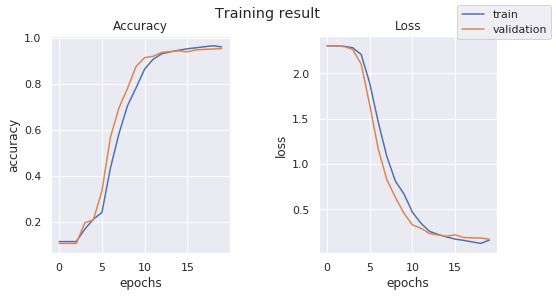

In [29]:
display_history(history = history)

In [30]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9518


## Weight initializer
- he_uniform
- he_normal
- glorot_normal   
cf) The default initializer is glorot_uniform, so it's not measured

In [0]:
def create_mlp(layers, initializer):
  model = Sequential()
  model.add(Dense(HIDDENS, input_shape = (784,), activation = 'relu', kernel_initializer = initializer))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(HIDDENS, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [32]:
if model != None:
  K.clear_session()
model = create_mlp(4, 'he_uniform')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 1.0947 - acc: 0.7100 - val_loss: 0.4772 - val_acc: 0.8744
Epoch 2/20
 - 2s - loss: 0.4188 - acc: 0.8835 - val_loss: 0.3443 - val_acc: 0.9002
Epoch 3/20
 - 2s - loss: 0.3360 - acc: 0.9030 - val_loss: 0.2931 - val_acc: 0.9158
Epoch 4/20
 - 2s - loss: 0.2971 - acc: 0.9140 - val_loss: 0.2683 - val_acc: 0.9212
Epoch 5/20
 - 2s - loss: 0.2708 - acc: 0.9204 - val_loss: 0.2472 - val_acc: 0.9288
Epoch 6/20
 - 2s - loss: 0.2499 - acc: 0.9271 - val_loss: 0.2336 - val_acc: 0.9319
Epoch 7/20
 - 2s - loss: 0.2334 - acc: 0.9317 - val_loss: 0.2222 - val_acc: 0.9333
Epoch 8/20
 - 2s - loss: 0.2182 - acc: 0.9365 - val_loss: 0.2159 - val_acc: 0.9344
Epoch 9/20
 - 2s - loss: 0.2055 - acc: 0.9401 - val_loss: 0.1983 - val_acc: 0.9423
Epoch 10/20
 - 2s - loss: 0.1946 - acc: 0.9440 - val_loss: 0.1911 - val_acc: 0.9434
Epoch 11/20
 - 2s - loss: 0.1849 - acc: 0.9453 - val_loss: 0.1852 - val_acc: 0.9443
Epoch 12/20
 - 2s - loss: 0.1763 - 

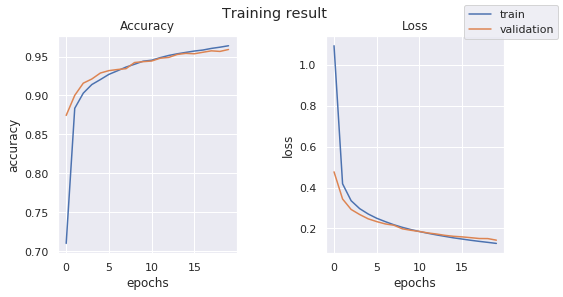

In [34]:
display_history(history = history)

In [35]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9563


In [36]:
if model != None:
  K.clear_session()
model = create_mlp(4,'he_normal')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 1.0977 - acc: 0.6965 - val_loss: 0.4741 - val_acc: 0.8738
Epoch 2/20
 - 2s - loss: 0.4197 - acc: 0.8815 - val_loss: 0.3395 - val_acc: 0.9043
Epoch 3/20
 - 2s - loss: 0.3363 - acc: 0.9026 - val_loss: 0.2929 - val_acc: 0.9172
Epoch 4/20
 - 2s - loss: 0.2965 - acc: 0.9133 - val_loss: 0.2644 - val_acc: 0.9271
Epoch 5/20
 - 2s - loss: 0.2700 - acc: 0.9222 - val_loss: 0.2475 - val_acc: 0.9308
Epoch 6/20
 - 2s - loss: 0.2495 - acc: 0.9280 - val_loss: 0.2312 - val_acc: 0.9337
Epoch 7/20
 - 2s - loss: 0.2324 - acc: 0.9334 - val_loss: 0.2203 - val_acc: 0.9378
Epoch 8/20
 - 2s - loss: 0.2182 - acc: 0.9370 - val_loss: 0.2061 - val_acc: 0.9415
Epoch 9/20
 - 2s - loss: 0.2057 - acc: 0.9411 - val_loss: 0.1975 - val_acc: 0.9444
Epoch 10/20
 - 2s - loss: 0.1939 - acc: 0.9440 - val_loss: 0.1903 - val_acc: 0.9445
Epoch 11/20
 - 2s - loss: 0.1842 - acc: 0.9466 - val_loss: 0.1841 - val_acc: 0.9477
Epoch 12/20
 - 2s - loss: 0.1755 - 

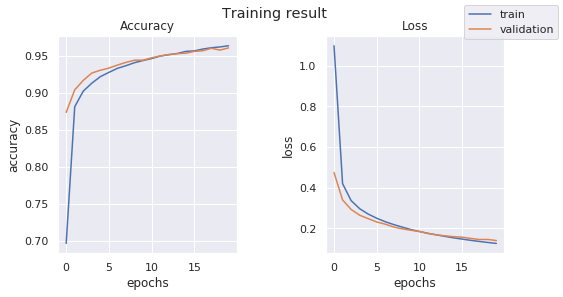

In [38]:
display_history(history = history)

In [39]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9619


In [40]:
if model != None:
  K.clear_session()
model = create_mlp(4, 'glorot_normal')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 1.6214 - acc: 0.5569 - val_loss: 0.7802 - val_acc: 0.8288
Epoch 2/20
 - 2s - loss: 0.5796 - acc: 0.8502 - val_loss: 0.4247 - val_acc: 0.8822
Epoch 3/20
 - 2s - loss: 0.4041 - acc: 0.8854 - val_loss: 0.3450 - val_acc: 0.8994
Epoch 4/20
 - 2s - loss: 0.3479 - acc: 0.9000 - val_loss: 0.3122 - val_acc: 0.9088
Epoch 5/20
 - 2s - loss: 0.3157 - acc: 0.9085 - val_loss: 0.2891 - val_acc: 0.9158
Epoch 6/20
 - 2s - loss: 0.2927 - acc: 0.9151 - val_loss: 0.2748 - val_acc: 0.9195
Epoch 7/20
 - 2s - loss: 0.2751 - acc: 0.9206 - val_loss: 0.2567 - val_acc: 0.9239
Epoch 8/20
 - 2s - loss: 0.2600 - acc: 0.9245 - val_loss: 0.2454 - val_acc: 0.9290
Epoch 9/20
 - 2s - loss: 0.2470 - acc: 0.9287 - val_loss: 0.2316 - val_acc: 0.9328
Epoch 10/20
 - 2s - loss: 0.2351 - acc: 0.9321 - val_loss: 0.2250 - val_acc: 0.9341
Epoch 11/20
 - 2s - loss: 0.2245 - acc: 0.9349 - val_loss: 0.2149 - val_acc: 0.9380
Epoch 12/20
 - 2s - loss: 0.2147 - 

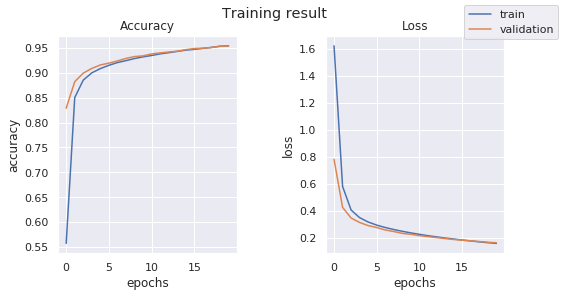

In [42]:
display_history(history = history)

In [43]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9508


## Optimizer
- rmsprop
- adam  
cf) sgd is already measured.

In [44]:
if model != None:
  K.clear_session()
model = create_mlp(4,'glorot_normal')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.3517 - acc: 0.8930 - val_loss: 0.1820 - val_acc: 0.9473
Epoch 2/20
 - 2s - loss: 0.1525 - acc: 0.9535 - val_loss: 0.1357 - val_acc: 0.9583
Epoch 3/20
 - 2s - loss: 0.1068 - acc: 0.9680 - val_loss: 0.1082 - val_acc: 0.9690
Epoch 4/20
 - 2s - loss: 0.0836 - acc: 0.9734 - val_loss: 0.1023 - val_acc: 0.9692
Epoch 5/20
 - 2s - loss: 0.0677 - acc: 0.9790 - val_loss: 0.1015 - val_acc: 0.9709
Epoch 6/20
 - 2s - loss: 0.0555 - acc: 0.9827 - val_loss: 0.1006 - val_acc: 0.9738
Epoch 7/20
 - 2s - loss: 0.0476 - acc: 0.9854 - val_loss: 0.1090 - val_acc: 0.9744
Epoch 8/20
 - 2s - loss: 0.0410 - acc: 0.9877 - val_loss: 0.1053 - val_acc: 0.9751
Epoch 9/20
 - 2s - loss: 0.0363 - acc: 0.9884 - val_loss: 0.1030 - val_acc: 0.9745
Epoch 10/20
 - 2s - loss: 0.0330 - acc: 0.9899 - val_loss: 0.1184 - val_acc: 0.9753
Epoch 11/20
 - 2s - loss: 0.0291 - acc: 0.9910 - val_loss: 0.1263 - val_acc: 0.9720
Epoch 12/20
 - 2s - loss: 0.0251 - 

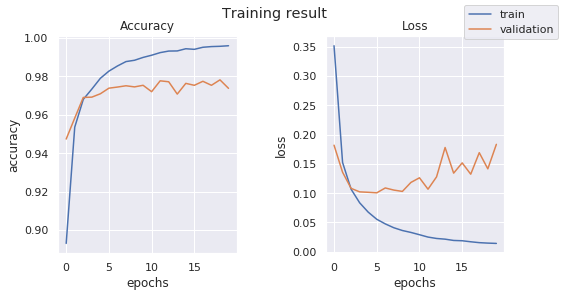

In [46]:
display_history(history = history)

In [47]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9751


In [48]:
if model != None:
  K.clear_session()
model = create_mlp(4,'glorot_normal')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.3489 - acc: 0.8979 - val_loss: 0.1658 - val_acc: 0.9524
Epoch 2/20
 - 2s - loss: 0.1332 - acc: 0.9606 - val_loss: 0.1278 - val_acc: 0.9631
Epoch 3/20
 - 2s - loss: 0.0920 - acc: 0.9716 - val_loss: 0.0969 - val_acc: 0.9717
Epoch 4/20
 - 2s - loss: 0.0692 - acc: 0.9790 - val_loss: 0.1027 - val_acc: 0.9697
Epoch 5/20
 - 2s - loss: 0.0532 - acc: 0.9831 - val_loss: 0.1051 - val_acc: 0.9708
Epoch 6/20
 - 2s - loss: 0.0426 - acc: 0.9866 - val_loss: 0.1049 - val_acc: 0.9701
Epoch 7/20
 - 2s - loss: 0.0343 - acc: 0.9891 - val_loss: 0.1069 - val_acc: 0.9727
Epoch 8/20
 - 2s - loss: 0.0277 - acc: 0.9913 - val_loss: 0.1002 - val_acc: 0.9734
Epoch 9/20
 - 2s - loss: 0.0269 - acc: 0.9911 - val_loss: 0.1031 - val_acc: 0.9736
Epoch 10/20
 - 2s - loss: 0.0191 - acc: 0.9935 - val_loss: 0.1098 - val_acc: 0.9742
Epoch 11/20
 - 2s - loss: 0.0196 - acc: 0.9935 - val_loss: 0.1127 - val_acc: 0.9748
Epoch 12/20
 - 2s - loss: 0.0170 - 

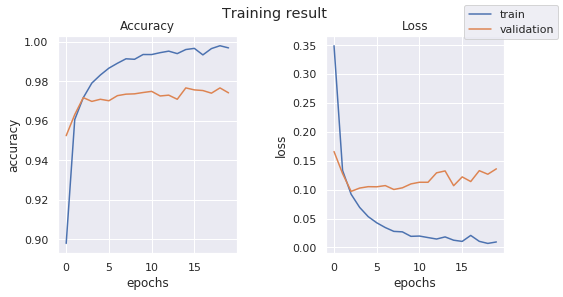

In [50]:
display_history(history = history)

In [51]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.975


In [0]:
from keras.regularizers import l2

def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(HIDDENS, input_shape = (784,), activation = 'relu', kernel_initializer = initializer,kernel_regularizer=l2(0.01)))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(HIDDENS, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [53]:
if model != None:
  K.clear_session()
model = create_mlp(4, 'glorot_normal')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.7854 - acc: 0.8914 - val_loss: 0.3116 - val_acc: 0.9455
Epoch 2/20
 - 2s - loss: 0.2874 - acc: 0.9453 - val_loss: 0.2446 - val_acc: 0.9569
Epoch 3/20
 - 2s - loss: 0.2344 - acc: 0.9570 - val_loss: 0.2252 - val_acc: 0.9593
Epoch 4/20
 - 2s - loss: 0.2254 - acc: 0.9586 - val_loss: 0.2048 - val_acc: 0.9677
Epoch 5/20
 - 2s - loss: 0.2071 - acc: 0.9629 - val_loss: 0.2162 - val_acc: 0.9616
Epoch 6/20
 - 2s - loss: 0.1977 - acc: 0.9654 - val_loss: 0.2065 - val_acc: 0.9599
Epoch 7/20
 - 2s - loss: 0.1883 - acc: 0.9677 - val_loss: 0.1985 - val_acc: 0.9665
Epoch 8/20
 - 2s - loss: 0.1853 - acc: 0.9680 - val_loss: 0.2036 - val_acc: 0.9648
Epoch 9/20
 - 2s - loss: 0.1758 - acc: 0.9707 - val_loss: 0.1776 - val_acc: 0.9708
Epoch 10/20
 - 2s - loss: 0.1700 - acc: 0.9705 - val_loss: 0.2000 - val_acc: 0.9650
Epoch 11/20
 - 2s - loss: 0.1705 - acc: 0.9709 - val_loss: 0.1910 - val_acc: 0.9641
Epoch 12/20
 - 2s - loss: 0.1608 - 

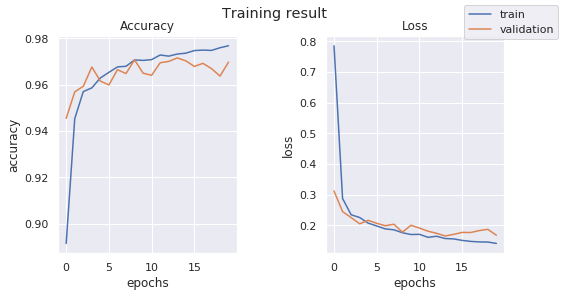

In [55]:
display_history(history = history)

In [56]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9714


## Regularization
- L2
- Dropout
- Batch normalization

In [0]:
from keras.regularizers import l2

def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(HIDDENS, input_shape = (784,), activation = 'relu', kernel_initializer = initializer, kernel_regularizer = l2(0.01)))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(HIDDENS, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [58]:
if model != None:
  K.clear_session()
model = create_mlp(4,'glorot_normal')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.7737 - acc: 0.8923 - val_loss: 0.3156 - val_acc: 0.9437
Epoch 2/20
 - 2s - loss: 0.2835 - acc: 0.9463 - val_loss: 0.2610 - val_acc: 0.9538
Epoch 3/20
 - 2s - loss: 0.2379 - acc: 0.9570 - val_loss: 0.2417 - val_acc: 0.9537
Epoch 4/20
 - 2s - loss: 0.2179 - acc: 0.9606 - val_loss: 0.2085 - val_acc: 0.9634
Epoch 5/20
 - 2s - loss: 0.2084 - acc: 0.9642 - val_loss: 0.2136 - val_acc: 0.9613
Epoch 6/20
 - 2s - loss: 0.1958 - acc: 0.9670 - val_loss: 0.2042 - val_acc: 0.9625
Epoch 7/20
 - 2s - loss: 0.1896 - acc: 0.9677 - val_loss: 0.2090 - val_acc: 0.9633
Epoch 8/20
 - 2s - loss: 0.1843 - acc: 0.9687 - val_loss: 0.1894 - val_acc: 0.9680
Epoch 9/20
 - 2s - loss: 0.1758 - acc: 0.9700 - val_loss: 0.2108 - val_acc: 0.9590
Epoch 10/20
 - 2s - loss: 0.1723 - acc: 0.9709 - val_loss: 0.1843 - val_acc: 0.9688
Epoch 11/20
 - 2s - loss: 0.1641 - acc: 0.9732 - val_loss: 0.1862 - val_acc: 0.9689
Epoch 12/20
 - 2s - loss: 0.1629 - 

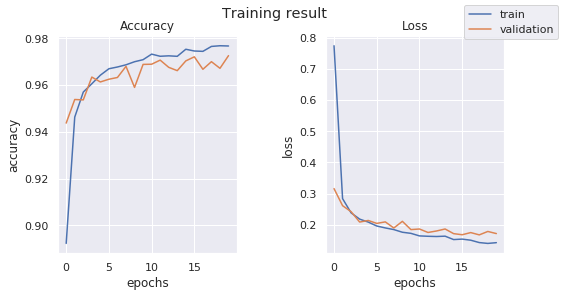

In [60]:
display_history(history = history)

In [61]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9748


In [0]:
from keras.layers.core import Dropout

def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(HIDDENS, input_shape = (784,), activation = 'relu', kernel_initializer = initializer))
  model.add(Dropout(0.3))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(HIDDENS, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [63]:
if model != None:
  K.clear_session()
model = create_mlp(4,'glorot_normal')
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________

In [64]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.4334 - acc: 0.8690 - val_loss: 0.1615 - val_acc: 0.9513
Epoch 2/20
 - 2s - loss: 0.1851 - acc: 0.9435 - val_loss: 0.1195 - val_acc: 0.9646
Epoch 3/20
 - 2s - loss: 0.1468 - acc: 0.9547 - val_loss: 0.1070 - val_acc: 0.9671
Epoch 4/20
 - 2s - loss: 0.1213 - acc: 0.9614 - val_loss: 0.1003 - val_acc: 0.9703
Epoch 5/20
 - 2s - loss: 0.1078 - acc: 0.9653 - val_loss: 0.0948 - val_acc: 0.9733
Epoch 6/20
 - 2s - loss: 0.0950 - acc: 0.9692 - val_loss: 0.0855 - val_acc: 0.9747
Epoch 7/20
 - 2s - loss: 0.0850 - acc: 0.9727 - val_loss: 0.0900 - val_acc: 0.9735
Epoch 8/20
 - 2s - loss: 0.0786 - acc: 0.9745 - val_loss: 0.0897 - val_acc: 0.9719
Epoch 9/20
 - 2s - loss: 0.0744 - acc: 0.9759 - val_loss: 0.0835 - val_acc: 0.9754
Epoch 10/20
 - 2s - loss: 0.0713 - acc: 0.9762 - val_loss: 0.0956 - val_acc: 0.9733
Epoch 11/20
 - 2s - loss: 0.0663 - acc: 0.9776 - val_loss: 0.0890 - val_acc: 0.9754
Epoch 12/20
 - 2s - loss: 0.0610 - 

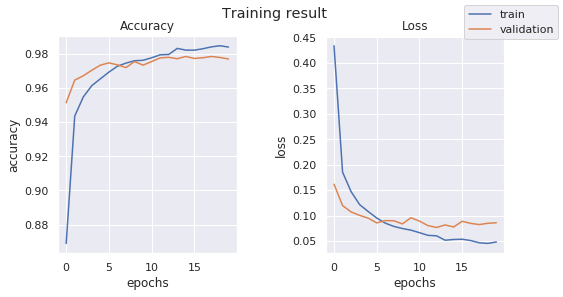

In [65]:
display_history(history = history)

In [66]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9796


In [0]:
from keras.layers import Activation, BatchNormalization
def create_mlp(layers, initializer):

  model = Sequential()
  model.add(Dense(HIDDENS, input_shape = (784,), kernel_initializer = initializer))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  if layers > 2:
    for i in range(layers - 2):
      model.add(Dense(HIDDENS, activation = 'relu',kernel_initializer=initializer))
  model.add(Dense(CLASSES, activation = 'softmax', kernel_initializer = initializer))
  return model

In [68]:
if model != None:
  K.clear_session()
model = create_mlp(4,'glorot_uniform')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 135,306
Trainable params: 135,050
Non-trainable params: 256
______________________________________________

In [69]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

timer = Timer()
timer.start_timer()
history = model.fit(X_train, Y_train, batch_size = BATCH_SIZE, epochs = EPOCHS,
                    verbose = VERBOSE, validation_split = VALIDATION_SPLIT)
elasped = timer.stop_timer()
print('Elasped time(HH:MM:SS.ms) - {}'.format(elasped))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.2940 - acc: 0.9131 - val_loss: 0.1448 - val_acc: 0.9558
Epoch 2/20
 - 2s - loss: 0.1061 - acc: 0.9673 - val_loss: 0.1126 - val_acc: 0.9672
Epoch 3/20
 - 2s - loss: 0.0702 - acc: 0.9783 - val_loss: 0.1008 - val_acc: 0.9691
Epoch 4/20
 - 2s - loss: 0.0527 - acc: 0.9828 - val_loss: 0.1107 - val_acc: 0.9677
Epoch 5/20
 - 2s - loss: 0.0400 - acc: 0.9870 - val_loss: 0.0904 - val_acc: 0.9734
Epoch 6/20
 - 2s - loss: 0.0321 - acc: 0.9898 - val_loss: 0.0906 - val_acc: 0.9741
Epoch 7/20
 - 2s - loss: 0.0272 - acc: 0.9911 - val_loss: 0.0969 - val_acc: 0.9733
Epoch 8/20
 - 2s - loss: 0.0235 - acc: 0.9922 - val_loss: 0.1105 - val_acc: 0.9732
Epoch 9/20
 - 2s - loss: 0.0191 - acc: 0.9935 - val_loss: 0.1087 - val_acc: 0.9726
Epoch 10/20
 - 2s - loss: 0.0194 - acc: 0.9933 - val_loss: 0.1085 - val_acc: 0.9737
Epoch 11/20
 - 2s - loss: 0.0167 - acc: 0.9944 - val_loss: 0.1057 - val_acc: 0.9755
Epoch 12/20
 - 2s - loss: 0.0144 - 

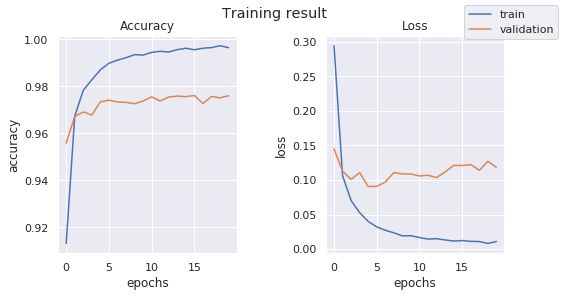

In [70]:
display_history(history = history)

In [71]:
_, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Accuracy :', acc)

Accuracy : 0.9778
